the picked angle is 111.60000000000001 degrees and 1.9477874452256718 radians
a= -0.368 b= 0.93
a*a= 0.136 b*b= 0.864


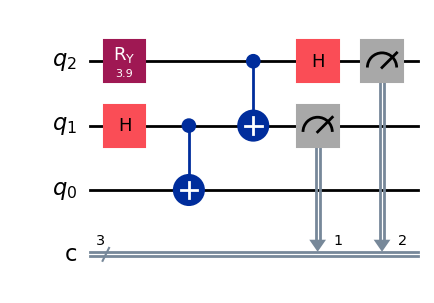

the state vector is
-0.0
0.0
0.9297764858882515
-0.368124552684678
-0.0
-0.0
-0.0
-0.0

the classical outcome is 01

the new quantum state is |01>(0.93|0>+-0.368|1>)
the new quantum state is |01>(+b|0>+a|1>)


In [1]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit_aer import StatevectorSimulator
from math import pi, cos, sin
from random import randrange

# quantum circuit with three qubits and three bits
q =  QuantumRegister(3,"q") 
c = ClassicalRegister(3,"c") 
qc = QuantumCircuit(q,c)

# rotate the first qubit by random angle
r = randrange(100)
theta = 2*pi*(r/100) # radians
print("the picked angle is",r*3.6,"degrees and",theta,"radians")
a = cos(theta)
b = sin(theta)
print("a=",round(a,3),"b=",round(b,3))
print("a*a=",round(a**2,3),"b*b=",round(b**2,3))
qc.ry(2*theta,q[2])

# creating an entanglement between q[1] and q[0]
qc.h(q[1])
qc.cx(q[1],q[0])

# CNOT operator by Asja on her qubits where q[2] is the control qubit 
qc.cx(q[2],q[1])

# Hadamard operator by Asja on q[2]
qc.h(q[2])

# the measurement done by Asja
qc.measure(q[2],c[2])
qc.measure(q[1],c[1])

# draw thw circuit
display(qc.draw(output='mpl',reverse_bits=True))

# read the state vector
job = StatevectorSimulator().run(qc,optimization_level=0,shots=1)
current_quantum_state=job.result().get_statevector(qc).data
print("the state vector is")
for i in range(len(current_quantum_state)):
    print(current_quantum_state[i].real)
print()

classical_outcomes = ['00','01','10','11']

for i in range(4):
    if (current_quantum_state[2*i].real != 0) or (current_quantum_state[2*i+1].real != 0):
        print("the classical outcome is",classical_outcomes[i])
        classical_outcome = classical_outcomes[i]
        balvis_state = [ current_quantum_state[2*i].real,current_quantum_state[2*i+1].real ]
print()
        
readable_quantum_state = "|"+classical_outcome+">"
readable_quantum_state += "("+str(round(balvis_state[0],3))+"|0>+"+str(round(balvis_state[1],3))+"|1>)"
print("the new quantum state is",readable_quantum_state)


all_states = ['000','001','010','011','100','101','110','111']

        
balvis_state_str = "|"+classical_outcome+">("
for i in range(len(current_quantum_state)):
    if abs(current_quantum_state[i].real-a)<0.000001: 
        balvis_state_str += "+a|"+ all_states[i][2]+">"
    elif abs(current_quantum_state[i].real+a)<0.000001:
        balvis_state_str += "-a|"+ all_states[i][2]+">"
    elif abs(current_quantum_state[i].real-b)<0.000001: 
        balvis_state_str += "+b|"+ all_states[i][2]+">"
    elif abs(current_quantum_state[i].real+b)<0.000001: 
        balvis_state_str += "-b|"+ all_states[i][2]+">"
balvis_state_str += ")"        
print("the new quantum state is",balvis_state_str)

# 🧪 Kuantum Devresi Oluşturuluyor

### 📌 1. Kuantum Devresi Tanımlanıyor
- **3 kuantum biti**: `q[0]`, `q[1]`, `q[2]`
- **3 klasik bit**: `c[0]`, `c[1]`, `c[2]`

---

### 🎲 2. q[2] Kuantum Bitine Rastgele Bir Dönüş Uygulanıyor
- `r = randrange(100)`: 0 ile 99 arasında rastgele bir sayı seçilir.
- `theta = 2*pi*(r/100)`: Bu sayı **radyana çevrilerek** `q[2]` üzerine **RY dönüşü** (y ekseni etrafında dönüş) uygulanır.
- **Amaç:** `q[2]` kuantum bitini rastgele bir **süperpozisyon durumuna** getirmek.

---

### 🔗 3. q[0] ve q[1] Arasında **Bell Dolaşıklığı (Entanglement)** Oluşturuluyor
- `qc.h(q[1])`: **Hadamard kapısı**, `q[1]`’i süperpozisyona alır.
- `qc.cx(q[1], q[0])`: **CNOT kapısı**, `q[1]`'in durumunu `q[0]` ile **dolaşık hale getirir**.
- **Sonuç:** `q[0]` ve `q[1]` artık dolaşıktır.

---

### 🧑‍💻 4. Asja’nın İşlemleri
- `qc.cx(q[2],q[1])`: `q[2]`, `q[1]` ile birleştirilir.
- `qc.h(q[2])`: `q[2]`’ye **Hadamard kapısı** uygulanır.
- `qc.measure(q[2],c[2])` ve `qc.measure(q[1],c[1])`: `q[2]` ve `q[1]` **ölçülerek** klasik bitlere yazılır.

---

### 📊 5. Kuantum Durumunun Ölçüm Sonrası Analizi
- **Devre çalıştırılır** ve **durum vektörü hesaplanır**.
- Ölçülen **klasik çıktı** kullanılarak **q[0]'ın durumu belirlenir**.

---

## 🔎 Ne Elde Ettik?
- `q[0]` ve `q[1]` dolaşıklık içindeyken, `q[2]` üzerindeki **rastgele dönüş, sonucun değişmesine sebep olur**.
- **Asja, `q[2]` ve `q[1]`'i ölçtüğünde, `q[0]`’ın olası yeni kuantum durumu belirlenir**.
- **Yeni kuantum durumu,** `a` ve `b` katsayılarıyla belirlenir.
- **Sonuç olarak:** Asja’nın ölçüm sonuçlarına bağlı olarak **`q[0]`’ın yeni durumu** (bir süperpozisyon veya belirli bir bit değeri) olarak tanımlanabilir.

---

## 🚀 Bu Kuantum Devresi Nerede Kullanılabilir?
- **🔐 Kuantum Kriptografi**
- **📡 Kuantum Haberleşme**
- **💻 Kuantum Hesaplama**
